### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

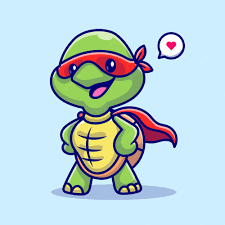

# Turtle Games




### Scenario
Turtle Games is a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points 
- how useful are remuneration and spending scores data 
- can social data (e.g. customer reviews) be used in marketing campaigns 

The sales team prefers R and wants to understand the following from the sales data

- what is the impact on sales per product 
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) 
- if there is any possible relationship(s) in sales between North America, Europe, and global sales 


We analyze the reviews data to answer the first three questions in this jupyter notebook

## 1. Load and explore the data

In [1]:
# Import all the necessary packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
import warnings  
warnings.filterwarnings('ignore')

In [3]:
# set parameters for visualizations
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)


In [4]:
# Load the CSV file(s) as reviews.

df_reviews = pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
df_reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [5]:
# Checking for missing values

df_reviews.isnull().sum()


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [6]:
# Exploring the data.
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
print("*** Printing Unique Values of all the Columns *** \n")

for i in df_reviews.columns:
    if i not in (['review','summary']):
        print("\n"+ i + " :: {}".format(df_reviews[i].unique()) )


*** Printing Unique Values of all the Columns *** 


gender :: ['Male' 'Female']

age :: [18 23 22 25 33 24 37 66 32 69 57 26 39 51 27 44 53 29 43 38 62 52 17 49
 40 67 46 35 58 45 50 71 72 65 19 41 70 34 28 56 54 36 68 42 55]

remuneration (k£) :: [ 12.3   13.12  13.94  14.76  15.58  16.4   17.22  18.86  19.68  20.5
  22.96  23.78  24.6   27.06  27.88  30.34  31.16  31.98  32.8   34.44
  35.26  36.08  37.72  38.54  39.36  40.18  41.    44.28  46.74  47.56
  48.38  49.2   50.02  50.84  51.66  52.48  53.3   54.94  56.58  57.4
  58.22  59.04  59.86  60.68  61.5   62.32  63.14  63.96  64.78  66.42
  69.7   70.52  71.34  72.16  76.26  79.54  80.36  81.18  82.82  84.46
  92.66  98.4  103.32 112.34]

spending_score (1-100) :: [39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]

loyalty_poin

In [8]:
# Descriptive statistics.
df_reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

Viewing the dataframe above it is observed that the columns **language** and  **platform** are redundant as they have only one unique value ie their values are same for all entries.Also the statistics in the output above for the product column does not provide much value as the **product** is a unique code allocated to product based on the item description.

## 2. Drop redundant columns

In [9]:
# Creating a new cleaned dataframe 

df_rev = df_reviews.copy() 

# Drop unnecessary columns language and platform
df_rev.drop(labels=['language','platform'],axis=1,inplace=True)
# View column names.
df_rev.columns

df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 3. Rename columns 
Change column headings to names that are easier to reference (e.g. renumeration and spending_score).

In [10]:
# Rename the column headers.
df_rev.rename(columns = {"remuneration (k£)":"remuneration","spending_score (1-100)":"spending_score"},inplace=True)
# View column names.
df_rev.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
df_rev.to_csv("turtle_reviews_cleaned.csv",index=False)

In [12]:
# Import new CSV file with Pandas.
reviews = pd.read_csv("turtle_reviews_cleaned.csv")

# View DataFrame.
reviews

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


plot multiple pairwise bivariate distributions in the dataset 

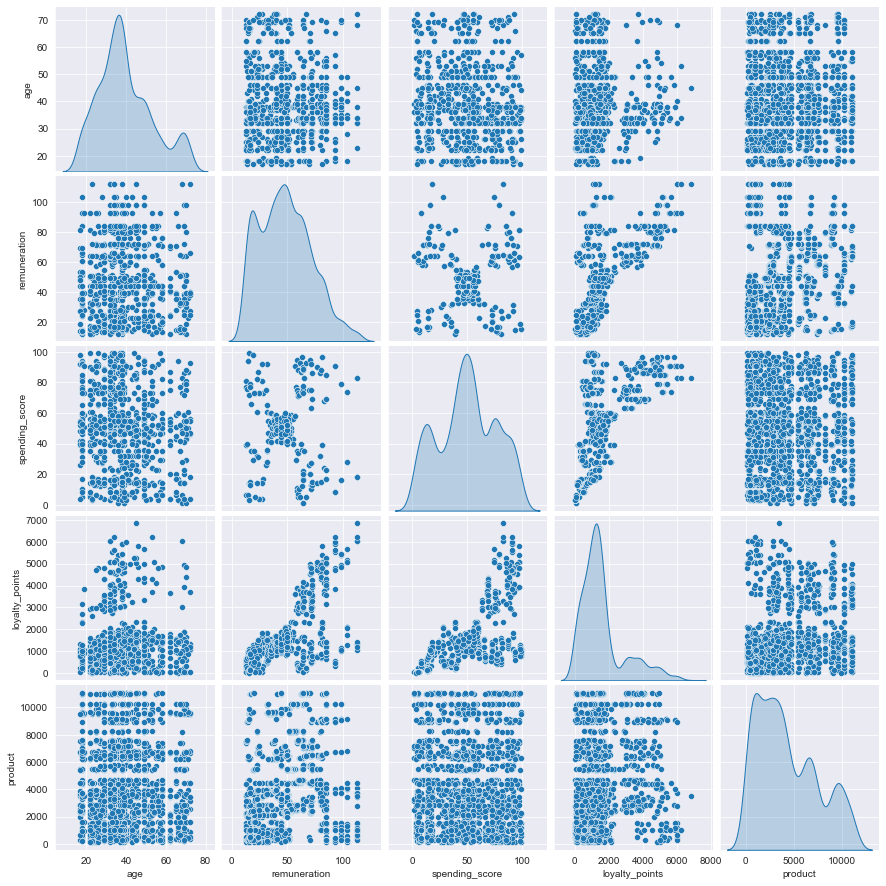

In [14]:
sns.pairplot(reviews,diag_kind='kde')

In [15]:
#Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})
# # Colour palette to make charts look better.
blue, = sns.color_palette("pastel", 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the Legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13)   

Text(0, 0.5, 'Loyalty Points')

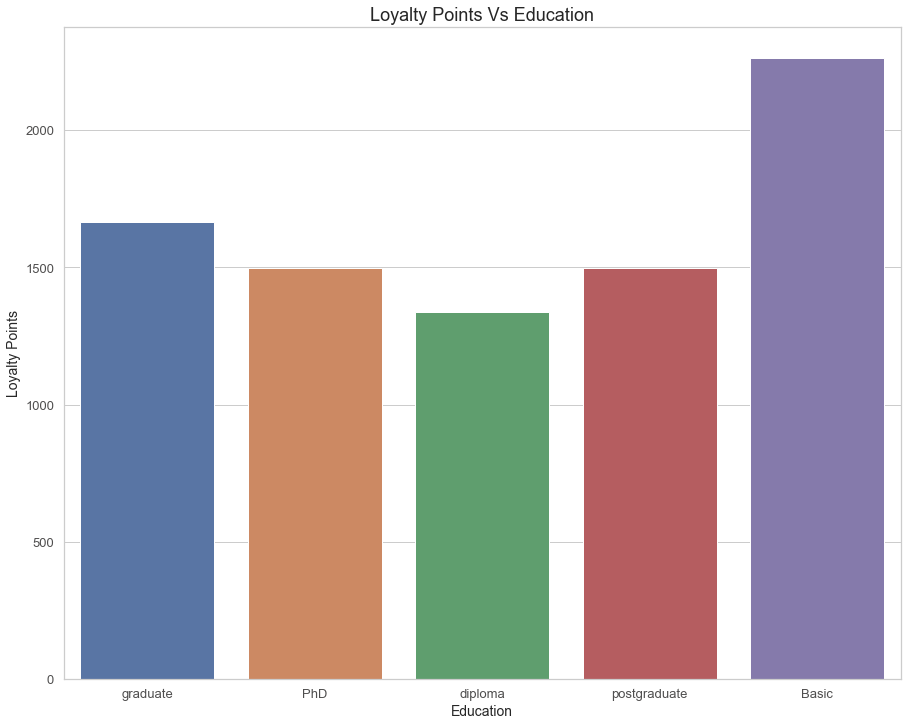

In [16]:
# Exploratory Plots
#df_reviews.head()
sns.barplot(y=reviews['loyalty_points'],x=reviews["education"],data=reviews,orient='v',ci=None)
plt.title("Loyalty Points Vs Education")
plt.xlabel("Education")
plt.ylabel("Loyalty Points")

Text(0, 0.5, 'Loyalty Points')

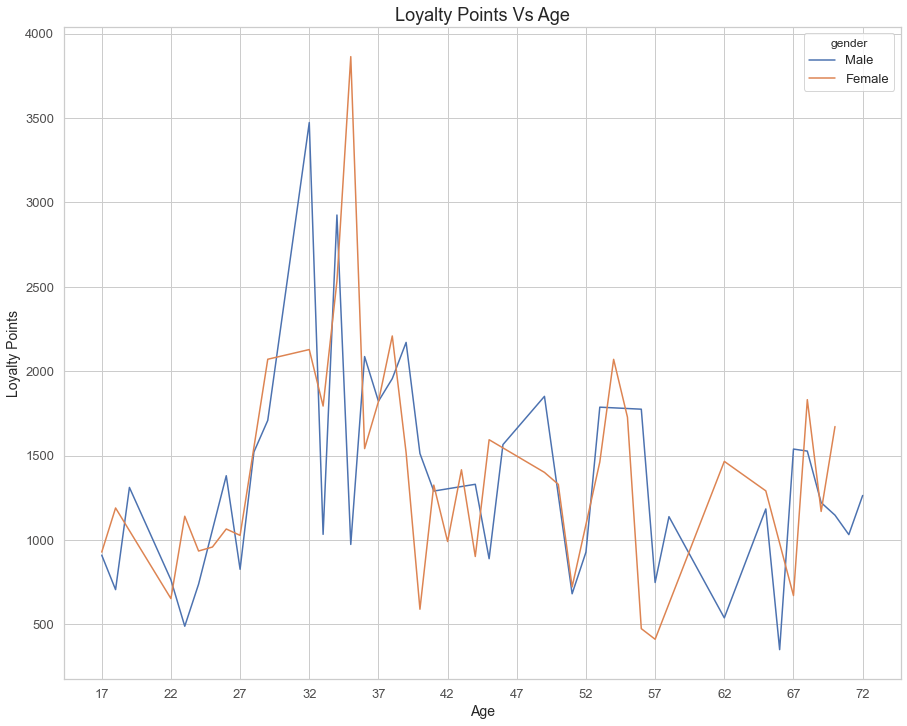

In [17]:
# Exploratory Plots

sns.lineplot(y=reviews['loyalty_points'],x=reviews["age"],hue='gender',data=reviews,ci=None)
plt.xticks(np.arange(min(reviews["age"]), max(reviews["age"])+1, 5.0))
plt.title("Loyalty Points Vs Age")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

## How customers accumulate loyalty points
- Using `linear regression` and the `statsmodels` functions investigate the possible relationships between the loyalty points and -:
        - age
        - remuneration 
        - and spending scores
        - multiple variables taken together

- determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 5. Linear regression

### 5a) spending vs loyalty

Text(0, 0.5, 'Loyalty Points')

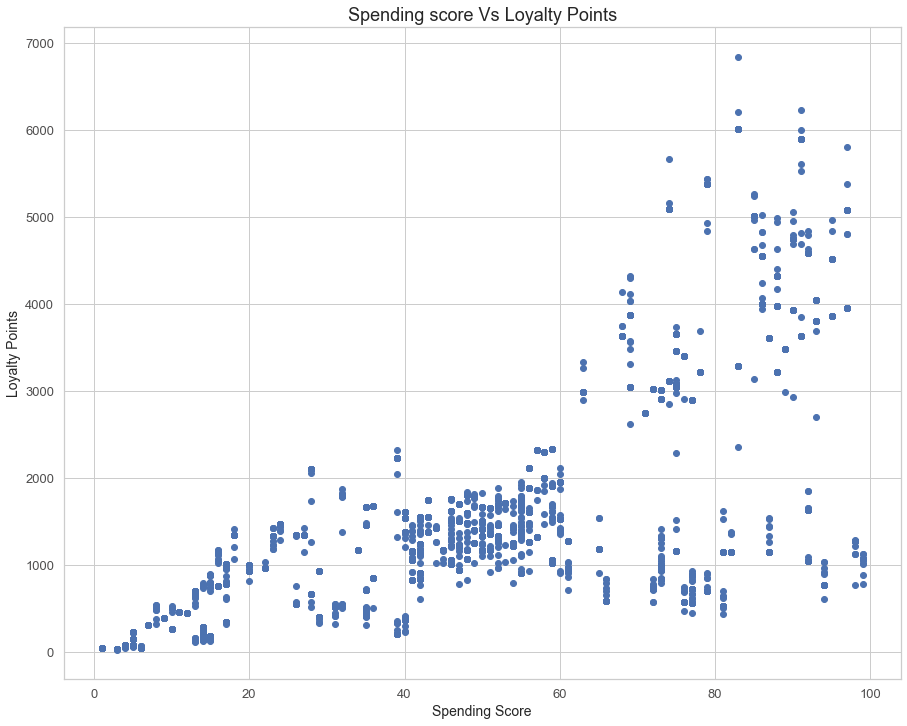

In [18]:
# Independent variable.
X=reviews['spending_score']

# Dependent variable.
y=reviews['loyalty_points']

# Check for linearity.
plt.scatter(X,y)
plt.title("Spending score Vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

In [19]:
# OLS model and summary.
f = 'y ~ X'
ols_spend = ols(f, data = reviews).fit()

# View the output.
ols_spend.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        19:31:03   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Extract the estimated parameters.
intercept,coeff = ols_spend.params
#print(intercept,coeff)

# Extract the standard errors.
residuals = ols_spend.resid

# Extract the predicted values.
y_pred = intercept + coeff * X

In [21]:
# Set the X coefficient and the constant to generate the regression table.
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()


# View the output.
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        19:31:03   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.634      0.102    -165.129      15.024
spending_score    33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The summary of the model indicates the following -:**

𝑅2: Roughly 45% of the total variability of y (loyalty_points), is explained by the variability of X (spending score).
F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good. 
X: The coefficient of X describes the slope of the regression line, in other words, how much the response variable y change when X changes by 1 unit. In this activity, if the length that the customer's spending score (X) changes by 1 unit, the loyalty points (y) will change by 33.0617 units.
The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0, thus the estimated slope is significant.

The last two numbers related to spending_score in the (0.025,0.975) columns describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of X and y, then 95 out of the 100 samples will derive a slope that is within the interval (31.464 , 34.659).


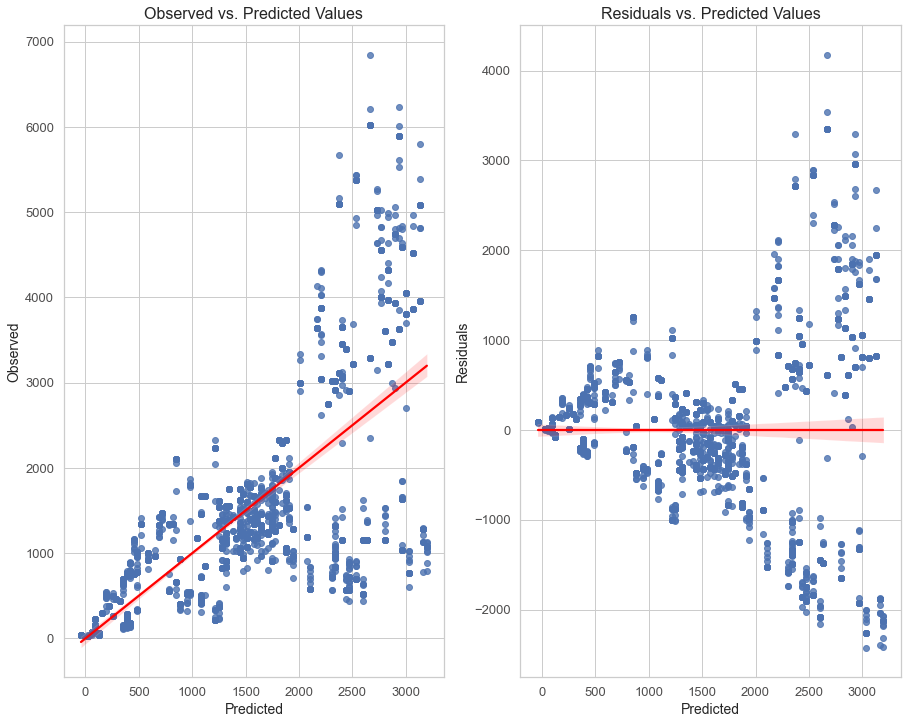

In [22]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=False, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=False, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)   

Linearity of the model

The dependent variable (y) is assumed to be a linear function of the independent variables (X, features) specified in the model. The specification must be linear in its parameters. Fitting a linear model to data with non-linear patterns results in serious prediction errors, especially out-of-sample (data not used for training the model).

To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or around a horizontal line in the latter one. In both cases with a roughly constant variance.The observed pattern indicates that the model makes systematic errors whenever it is making unusually large or small predictions. 

Mean of the residuals:  -6.829736776126083e-14


<AxesSubplot:ylabel='Count'>

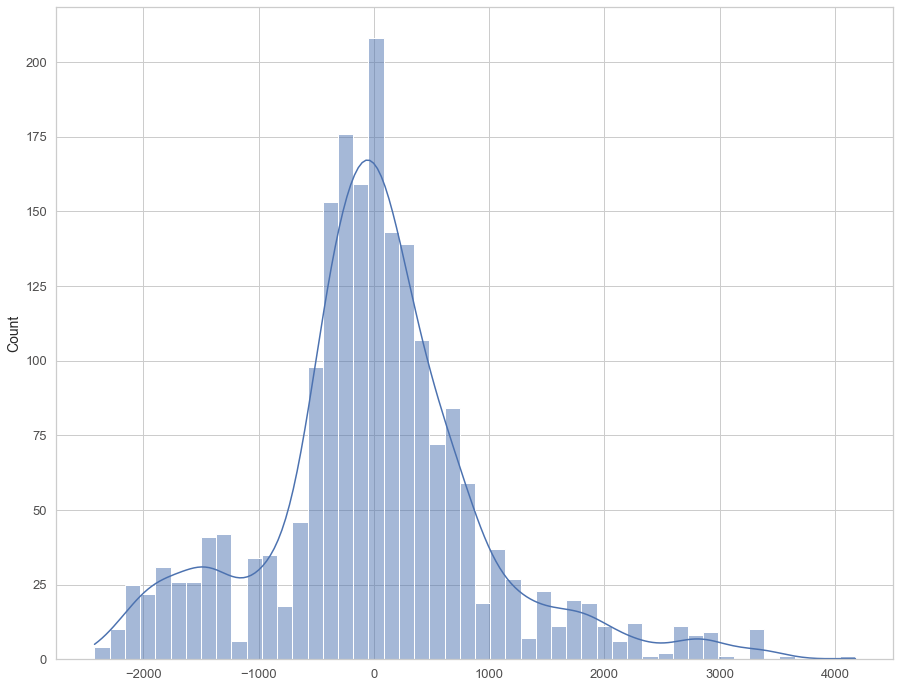

In [23]:
fitted_vals = lin_reg.predict()
residuals = lin_reg.resid
print("Mean of the residuals: ",residuals.mean())
sns.histplot(residuals,kde=True)



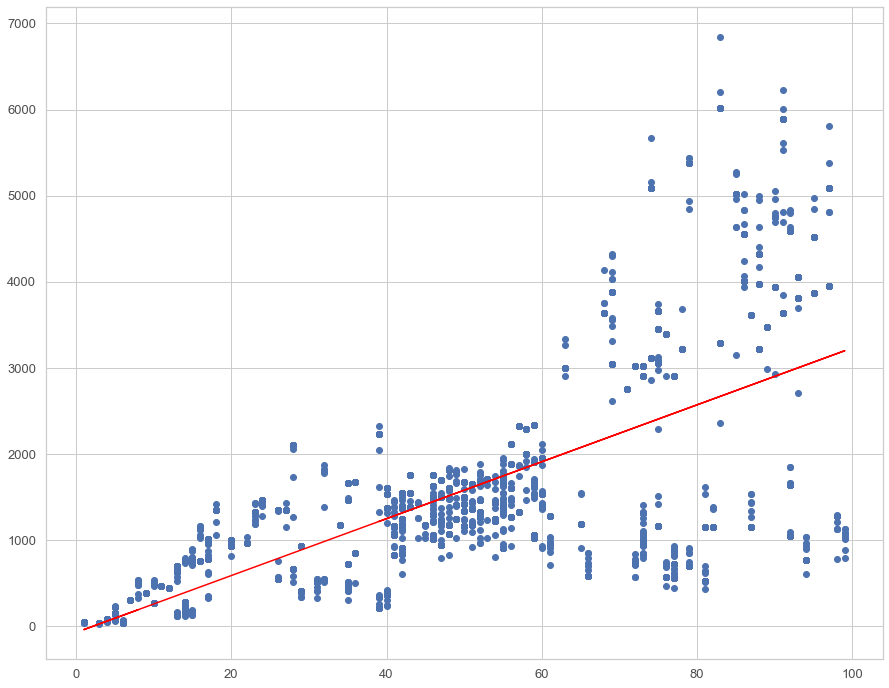

In [24]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, fitted_vals, color='red')

### 5b) remuneration vs loyalty

Text(0, 0.5, 'Loyalty Points')

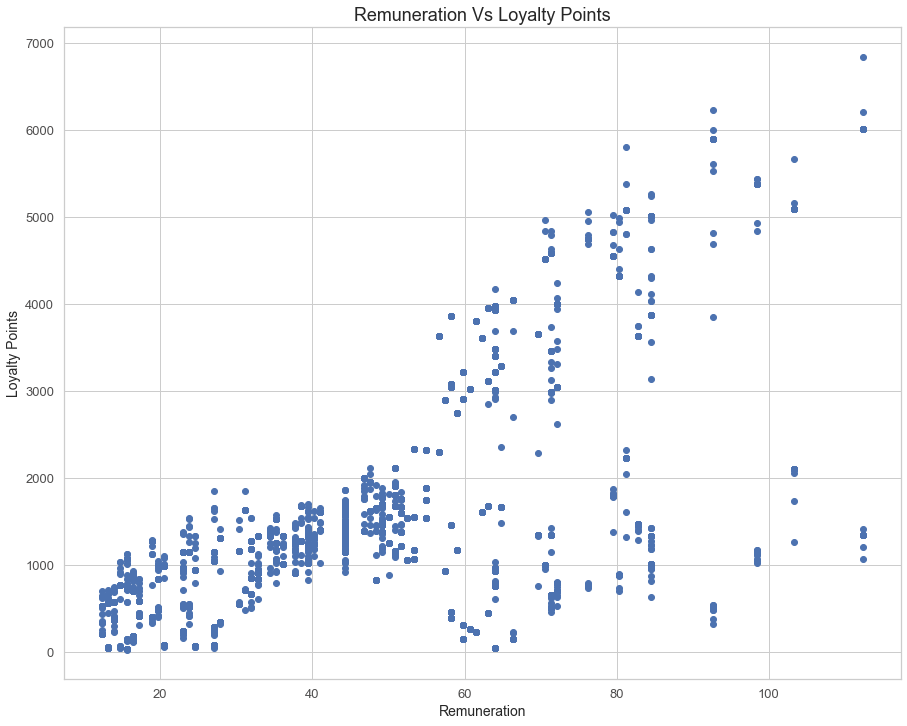

In [25]:
# Independent variable.
X=reviews['remuneration']

# Dependent variable.
y=reviews['loyalty_points']

plt.scatter(X,y)
plt.title("Remuneration Vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")

In [26]:
# OLS model and summary.

f = 'y ~ X'
ols_remun = ols(f, data = reviews).fit()

# View the output.
ols_remun.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        19:31:05   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Extract the estimated parameters.
intercept,coeff = ols_remun.params
#print(intercept,coeff)

# Extract the standard errors.
residuals = ols_remun.resid

# Extract the predicted values.
y_pred = intercept + coeff * X

In [28]:
# Set the X coefficient and the constant to generate the regression table.
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()


# View the output.
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        19:31:05   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259      0.208    -168.001      36.628
remuneration    34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The summary of the model indicates the following -:**

𝑅2: Roughly 38% of the total variability of y (loyalty_points), is explained by the variability of X (spending score).
F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good. 
X: The coefficient of X describes the slope of the regression line, in other words, how much the response variable y change when X changes by 1 unit. In this activity, if the length that the remuneration value(X) changes by 1 unit, the loyalty points (y) will change by 34.18 units.
The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0, thus the estimated slope is significant.

The last two numbers related to spending_score in the (0.025,0.975) columns describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of X and y, then 95 out of the 100 samples will derive a slope that is within the interval (32.270 , 36.106).


Mean of the residuals:  3.151399141643196e-13


<AxesSubplot:ylabel='Count'>

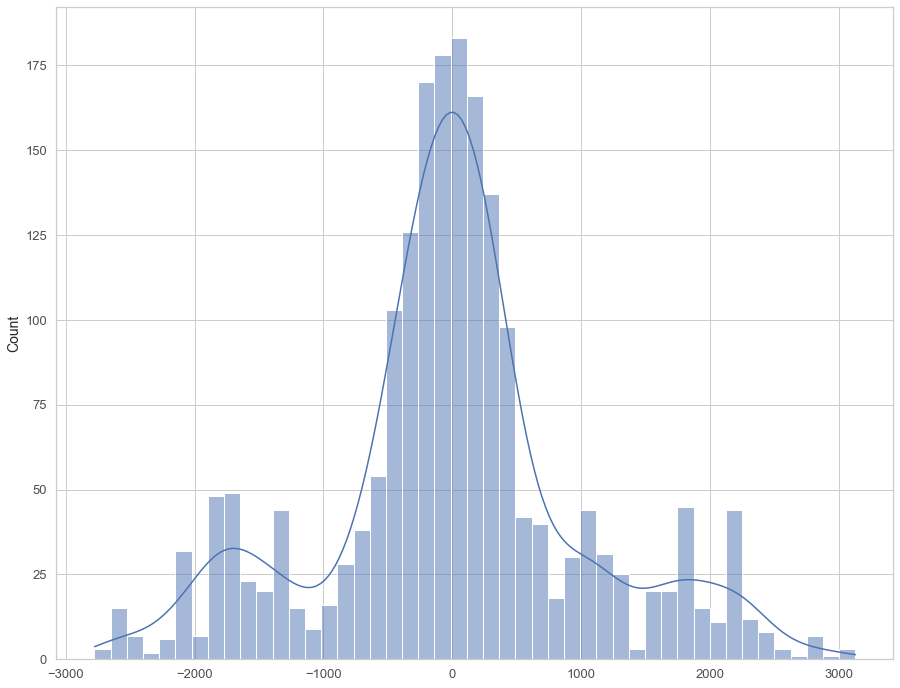

In [29]:
fitted_vals = lin_reg.predict()
residuals = lin_reg.resid
print("Mean of the residuals: ",residuals.mean())
sns.histplot(residuals,kde=True)

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Observed')]

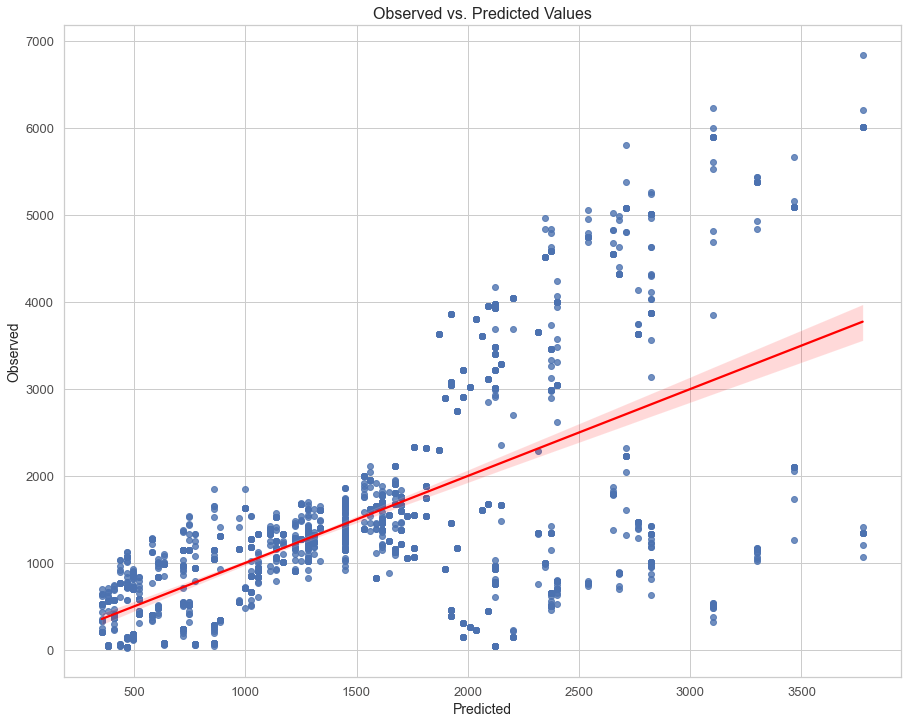

In [30]:
# Plot graph with regression line.
fig, ax = plt.subplots()
sns.regplot(x=fitted_vals, y=y, lowess=False, line_kws={'color': 'red'})
ax.set_title('Observed vs. Predicted Values', fontsize=16)
ax.set(xlabel='Predicted', ylabel='Observed')

Linearity of the model

As discussed above the dependent variable (y) is assumed to be a linear function of the independent variables (X, features) specified in the model.The linearity is crucial for accurate predictions.The observed pattern indicates that the model makes systematic errors whenever it is making unusually large or small predictions. 

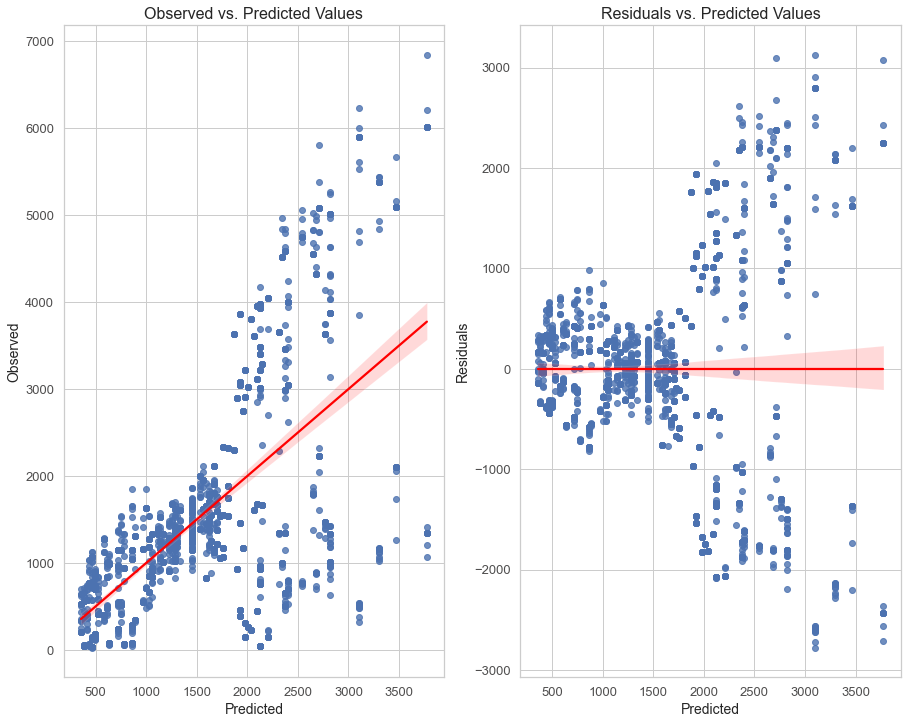

In [31]:
linearity_test(lin_reg, y)   

### 5c) age vs loyalty

Text(0, 0.5, 'Loyalty Points')

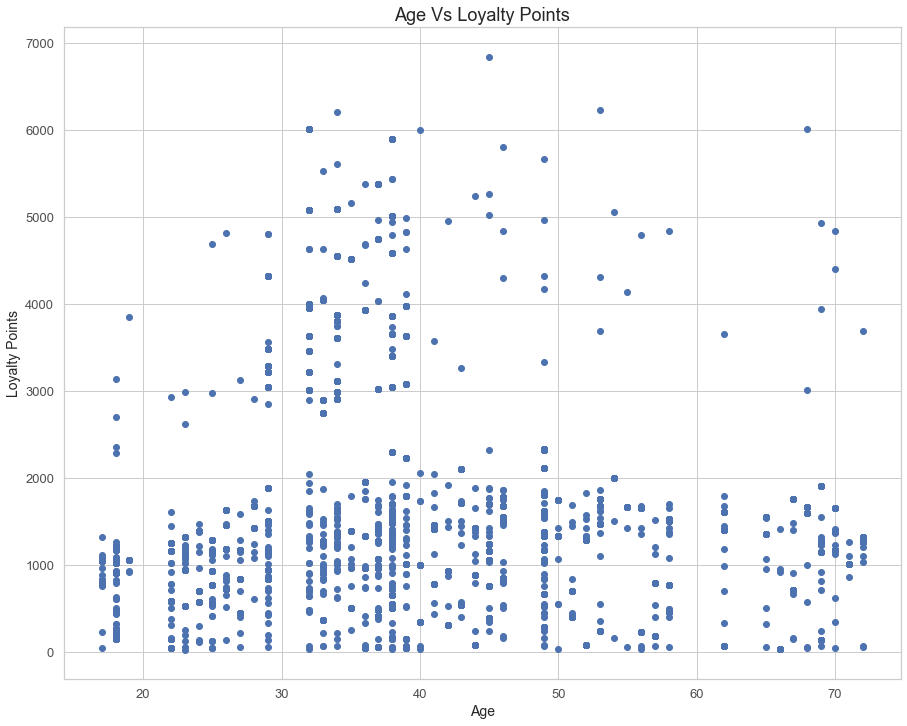

In [32]:
# Independent variable.
X=reviews['age']

# Dependent variable.
y=reviews['loyalty_points']

# Check for linearity.
plt.scatter(X,y)
plt.title("Age Vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

From the scatterplot we can see that variables age and loyalty points do not appear to have a linear relationship indicating that a linear regression model with age as the independent variable and loyalty points as the dependent variable will not be able make accurate predictions.

In [33]:
# OLS model and summary.
f = 'y ~ X'
ols_age = ols(f, data = reviews).fit()

# View the output.
ols_age.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0577
Time:                        19:31:07   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Set the X coefficient and the constant to generate the regression table.
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()


# View the output.
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0577
Time:                        19:31:07   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.000    1563.449    1909.587
age           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value of R-squared indicates that roughly less than 0.2% of the total variability of y (loyalty_points), is explained by the variability of X (spending score) using this linear model and making accurate predictions based on this model is not possible.

Mean of the residuals:  8.083134162006899e-14


<AxesSubplot:ylabel='Count'>

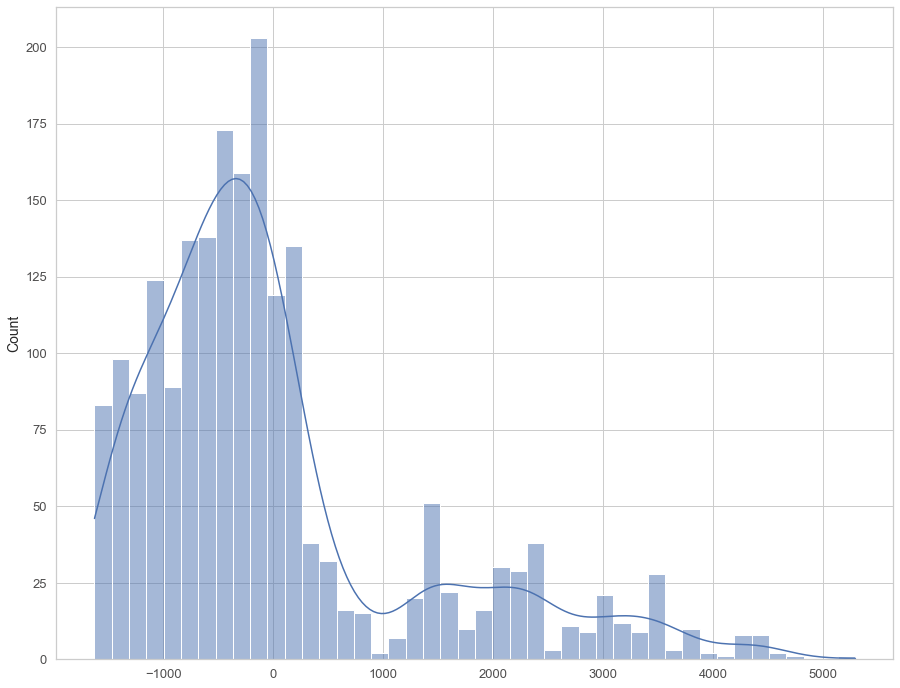

In [35]:
fitted_vals = lin_reg.predict()
residuals = lin_reg.resid
print("Mean of the residuals: ",residuals.mean())
sns.histplot(residuals,kde=True)

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Observed')]

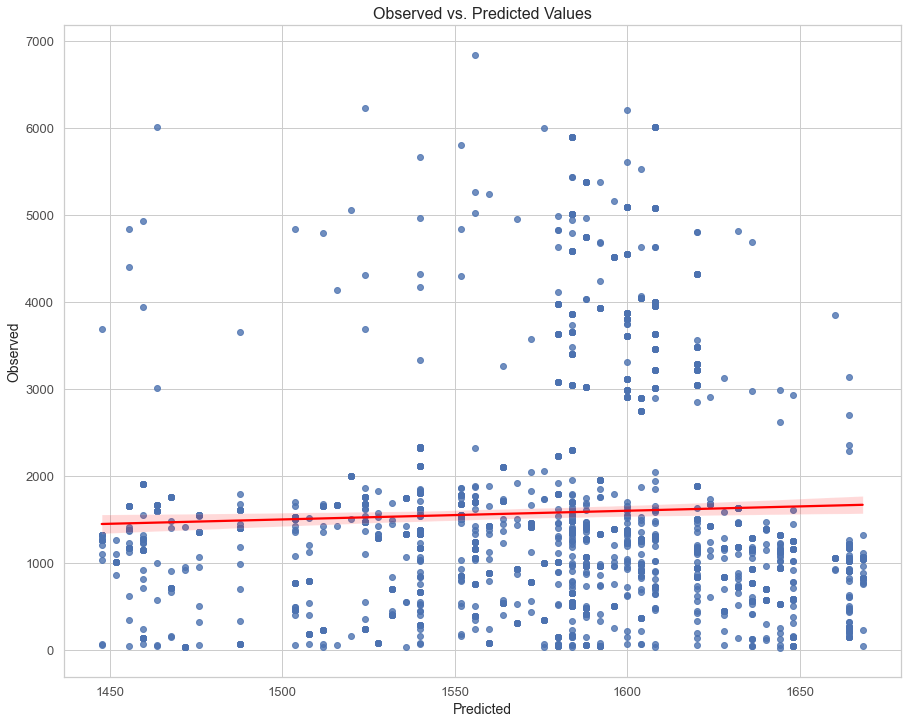

In [36]:
# Plot graph with regression line.
fig, ax = plt.subplots()
sns.regplot(x=fitted_vals, y=y, lowess=False, line_kws={'color': 'red'})
ax.set_title('Observed vs. Predicted Values', fontsize=16)
ax.set(xlabel='Predicted', ylabel='Observed')

As expected the plot indicates that the model makes systematic errors in making predictions and the points are not symmetrically distributed around the regression line.

### 5d) Multiple Linear Regression

Multiple linear regression uses more than one independent variable for predicting a dependent variable and can often make more accurate predictions. 
A multiple linear regression model as the univariate linear regression model makes certain assumptions that must be fulfilled for regression analysis.

The assumptions are -:
  - Linearity
  - Multicollinearity
  - Homoscedasticity
  - Multivariate normality
  - Autocorrelation

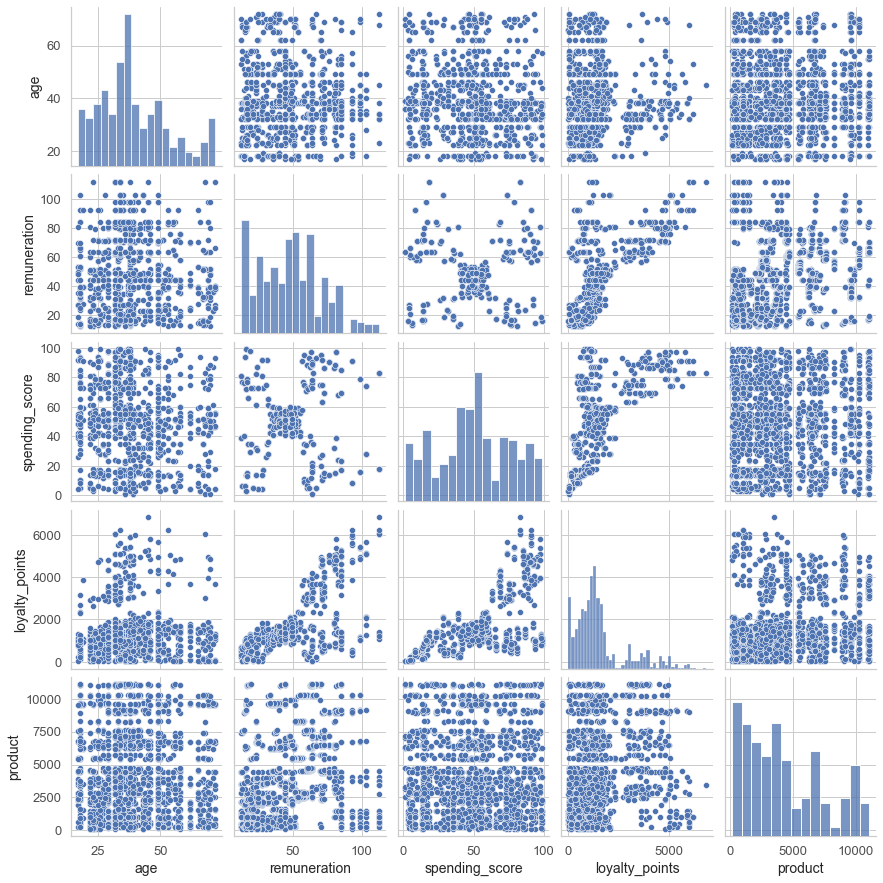

In [37]:
sns.pairplot(reviews)

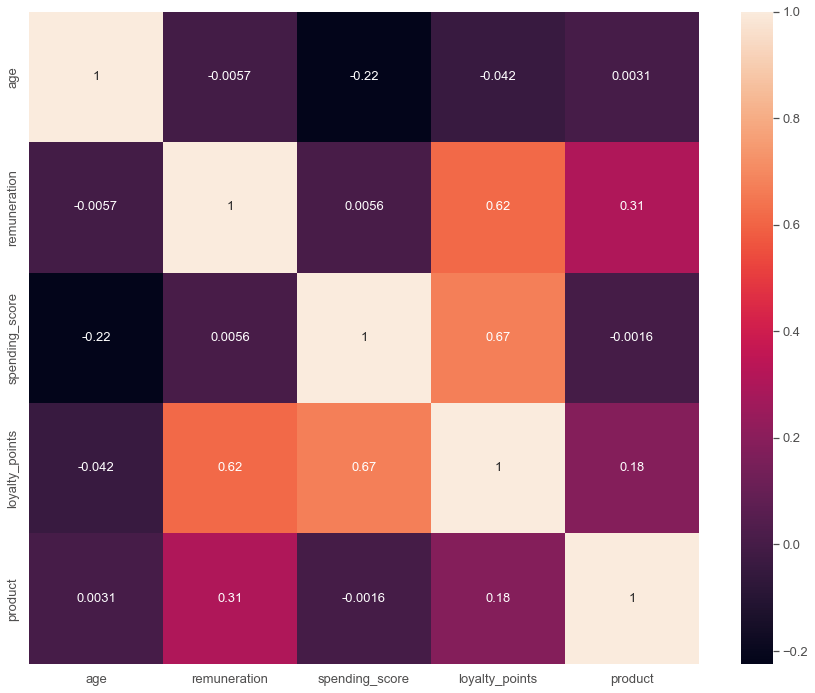

In [38]:
matrix = reviews.corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
)
sns.heatmap(matrix, annot=True)
plt.show()


Based on the pairplot and the linear regression analysis above spending score and remuneration and age are selected as independent variables.

In [39]:
# Define the dependent variable.
y = reviews['loyalty_points'] 

# Define the independent variable.
X = reviews[['spending_score', 'remuneration','age']] 

In [40]:
# # Import all the necessary packages.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [41]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:31:12   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2197.0105     58.134    -37.

The summary of the multiple regression model indicates the following -:

𝑅2: Roughly 84.2% of the total variability of y (loyalty_points) is explained by the variability of X features (spending score and remuneration) which indicates this model can make more accurate predictions than the previous univariate models above. F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good.It is 0 here indicating they are significant.

X: The coefficient of X describes the slope of the regression line, in other words, how much the response variable y change when X features changes. The equation for multiple linear regression is given by y = m1x1 + m2x2 + m3x3+intercept where m1 and m2 and m3 are the coefficients of variables x1 and x2 and x3 ,spending_score and remuneration and age in this case. The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0, thus the estimated slope is significant.

In [42]:
# To improve the model we transform the dependent variable and test

In [43]:
# Define the dependent variable.
y = np.sqrt(reviews['loyalty_points']) 

# Define the independent variable.
X = reviews[['spending_score', 'remuneration','age']] 

In [44]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [45]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     5095.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:31:12   Log-Likelihood:                -4773.0
No. Observations:                1600   AIC:                             9554.
Df Residuals:                    1596   BIC:                             9575.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.3591      0.545    -20.

The summary of the multiple regression model indicates the following -:
We notice that R2 value improves and this model provides better results.
𝑅2: Roughly 90.5% of the total variability of y (loyalty_points) is explained by the variability of X features (spending score and remuneration) which indicates this model can make more accurate predictions than the previous univariate models above. F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good.It is 0 here indicating they are significant.

X: The coefficient of X describes the slope of the regression line, in other words, how much the response variable y change when X features changes. The equation for multiple linear regression is given by y = m1x1 + m2x2 + m3x3+intercept where m1 and m2 and m3 are the coefficients of variables x1 and x2 and x3 ,spending_score and remuneration and age in this case. The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0, thus the estimated slope is significant.

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Observed')]

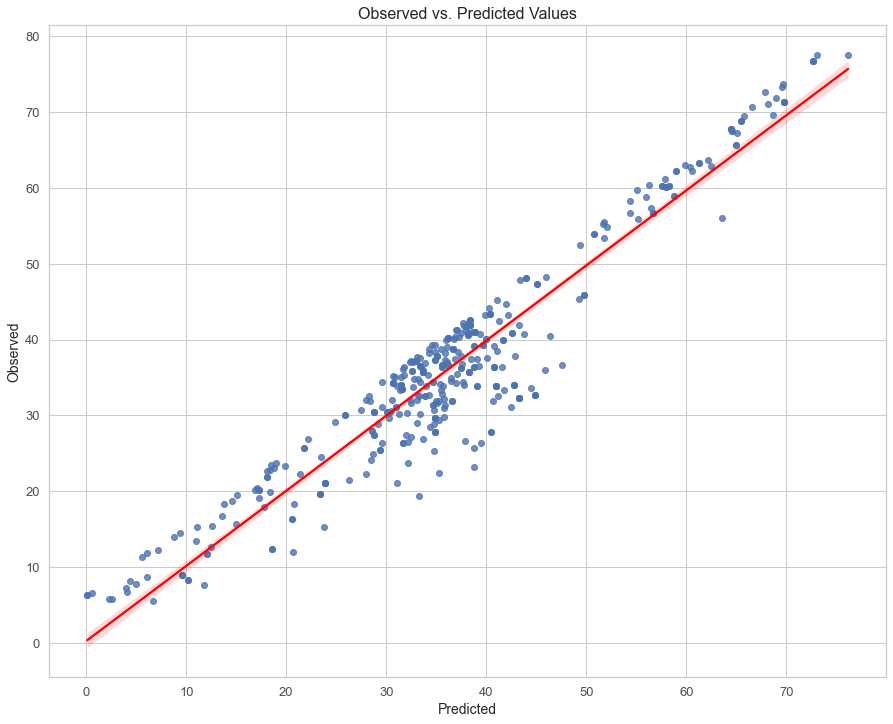

In [46]:
# plot Y_pred (predicted values) vs y_test (observed or actual values)
fig, ax = plt.subplots()
sns.regplot(x=Y_pred, y=y_test,line_kws={'color': 'red'})
ax.set_title('Observed vs. Predicted Values', fontsize=16)
ax.set(xlabel='Predicted', ylabel='Observed')

Checking for multicollinearity and heteroscedasticity.

In [47]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        20.7           const
1         1.1  spending_score
2         1.0    remuneration
3         1.1             age


When VIF value is one, then there is no correlation between an independent variable and any others. A value between five and ten suggests that correlation is moderate. If the VIF is greater than ten, then multicollinearity is high and estimates will have large standard errors and unreliable p-values.The independent variables spending_score,age and remuneration have a VIF value of 1 each indicating no multicollinearity.

we next test for heteroscedasticity using the Breusch-Pagan test. A Breusch-Pagan test follows the below hypotheses:

The null hypothesis (H0): Signifies that Homoscedasticity is present.
The alternative hypothesis: (Ha): Signifies that the Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [48]:
import statsmodels.stats.api as sms
# Determine heteroscedasticity.
test = sms.het_breuschpagan(model.resid, model.model.exog) 
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 10.343281212398736, 'LM Test p-value': 0.01586258213163228, 'F-stat': 3.461518162986094, 'F-test p-value': 0.015783588332743455}


Here, the Lagrange multiplier statistic for the test comes out to be equal to 10.34 and the corresponding p-value is very low. Since the p-value is less than 0.05 so we reject the null hypothesis. Heteroscedasticity may be present in the regression model.Heteroscedasticity means unequal scatter and makes the predictions less accurate.



Fitting the model using X features and y dependent variable loyalty points without splitting the data into training and test sets

In [49]:
# Set the X coefficient and the constant to generate the regression table.
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()


# View the output.
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     6486.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:31:13   Log-Likelihood:                -5938.0
No. Observations:                2000   AIC:                         1.188e+04
Df Residuals:                    1996   BIC:                         1.191e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.3140      0.481    -23.539      0.000     -12.257     -10.371
spending_score     0.4451      0.004    107.289      0.000       0.437       0.453
remuneration       0.4039      0.005     88.542      0.000       0.395       0.413
age                0.1579      0.008     19.799      0.000       0.142       0.174
==============================================================================
Omnibus:                      352.466   Durbin-Watson:                   2.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.569
Skew:                          -1.213   Prob(JB):                    1.14e-122
Kurtosis:                       3.925   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary of the multiple regression model indicates the following -:

𝑅2 and adjusted R2: Roughly 90.7% of the total variability of y (loyalty_points) is explained by the variability of X features (spending score,age and remuneration) which indicates this model can make more accurate predictions than the previous univariate models as discussed above. 

<AxesSubplot:ylabel='Count'>

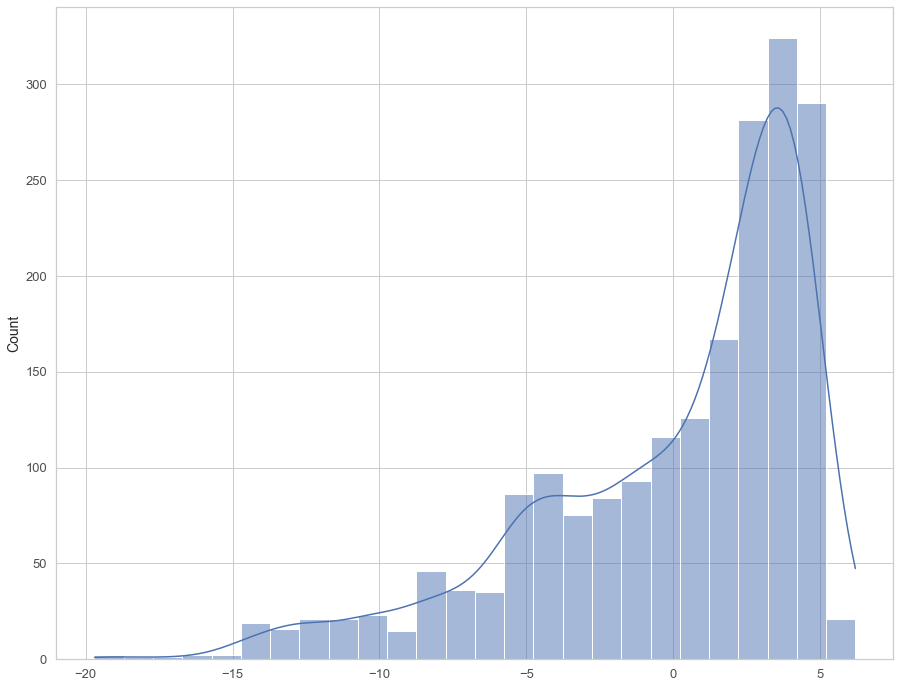

In [50]:
fitted_vals = lin_reg.predict()
residuals = lin_reg.resid
sns.histplot(residuals,kde=True)

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Observed')]

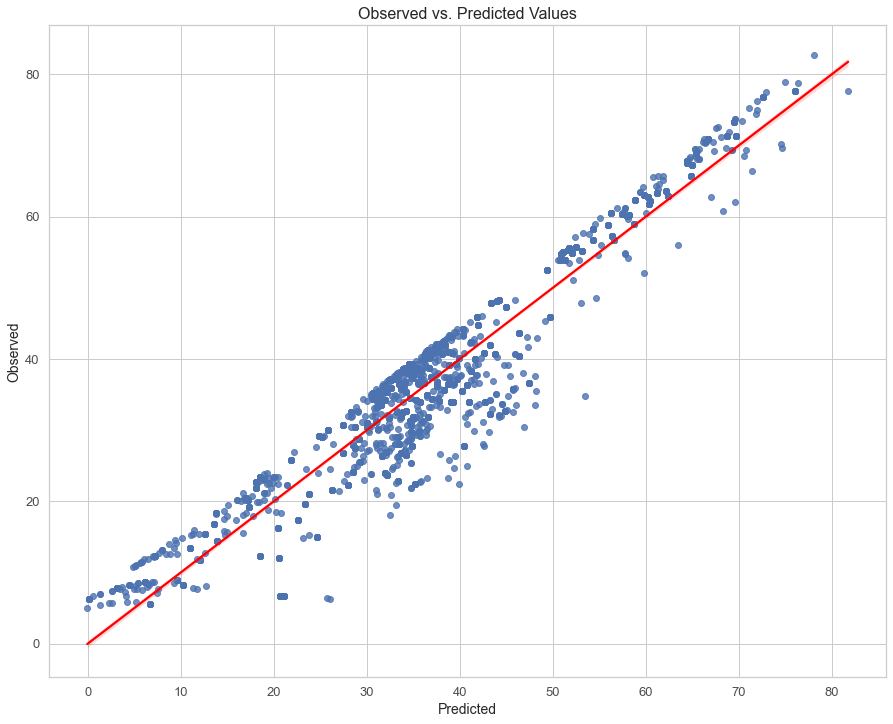

In [51]:
# Plot graph with regression line.
fig, ax = plt.subplots()
sns.regplot(x=fitted_vals, y=y, lowess=False, line_kws={'color': 'red'})
ax.set_title('Observed vs. Predicted Values', fontsize=16)
ax.set(xlabel='Predicted', ylabel='Observed')

In [52]:
# check normality of residuals
from scipy.stats import shapiro
#perform Shapiro-Wilk test
shapiro(residuals)

ShapiroResult(statistic=0.8695414066314697, pvalue=5.958374319650767e-38)

Since the p-value is less than .05, we reject the null hypothesis.The residuals data does not observe a normal distribution.



In [53]:
# since we have estimated the square root of loyalty points, 
#the square of predicted values would give us a estimate of the loyalty points

predictions = np.square(fitted_vals)

## 6. Observations and insights

***Key observations...***

Roughly 90.7% of the total variability of y (loyalty_points) is explained by the variability of X features (spending score,age and remuneration) which indicates multiple regression model can make more accurate predictions than the previous univariate models. However as the residuals are not normally distributed , the model may not explain all the trends in the loyalty points and may not predict values that outliers for example.


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Steps Involved
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [54]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [55]:
# Load the CSV file(s) as df2.

df2 = pd.read_csv("turtle_reviews_cleaned.csv")
# View DataFrame.
df2

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [56]:
# Descriptive Statistics
df2.describe()

age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

## 2. Plot

Text(0, 0.5, 'Spending Score')

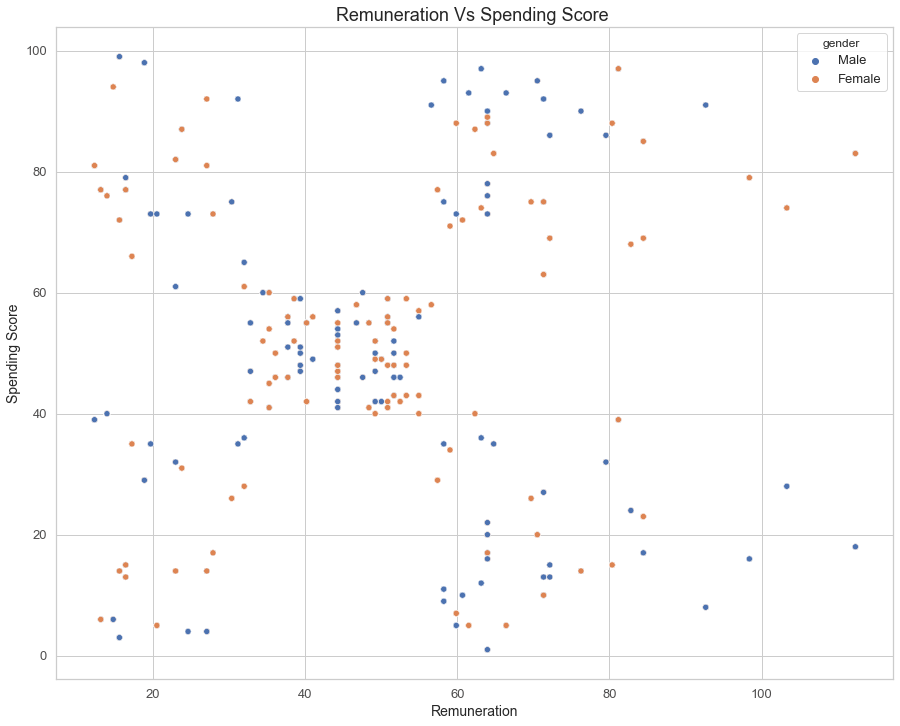

In [57]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2,
                hue='gender')
plt.title("Remuneration Vs Spending Score ")
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")

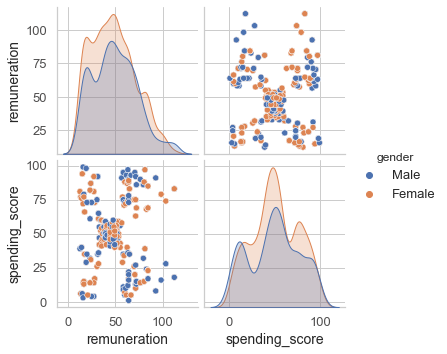

In [58]:
# Create a pairplot with Seaborn.
sns.pairplot(df2,
             vars=['remuneration','spending_score'],
             hue='gender',
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

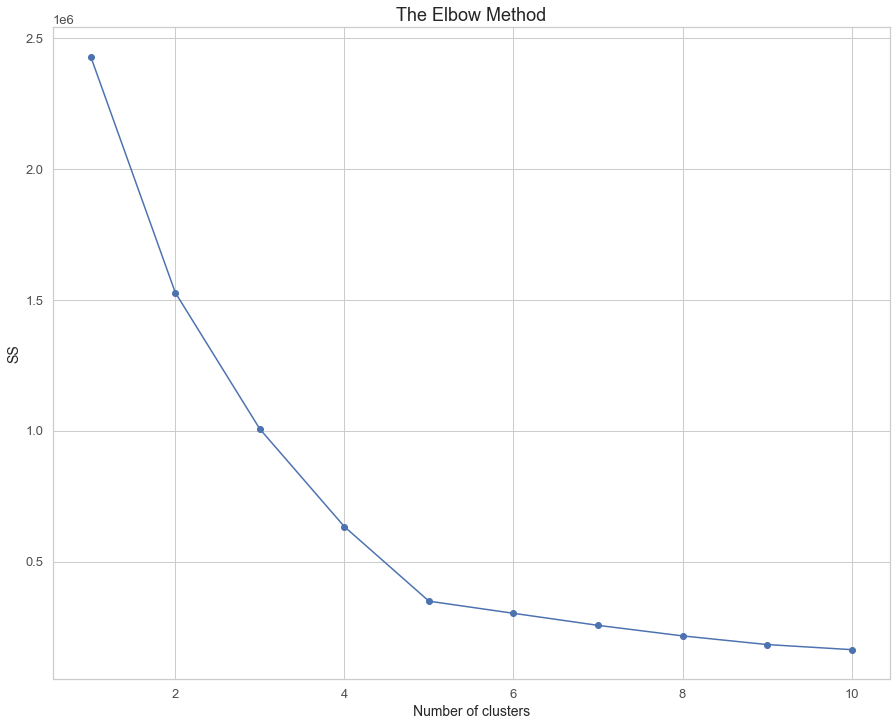

In [59]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
x=df2[['remuneration','spending_score']]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

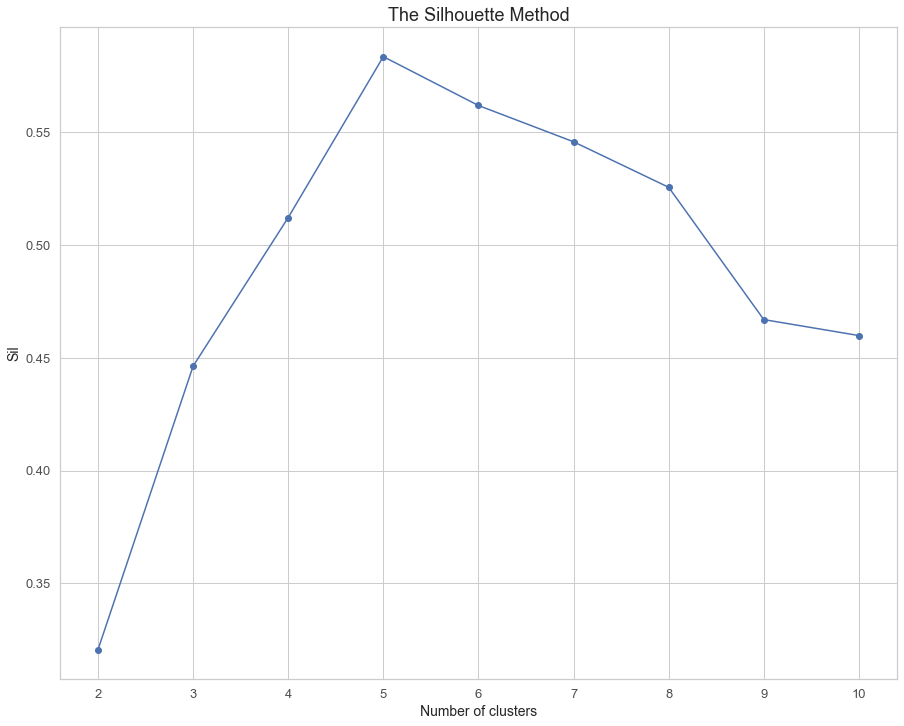

In [60]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

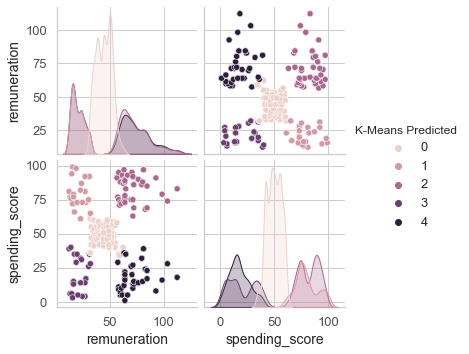

In [61]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

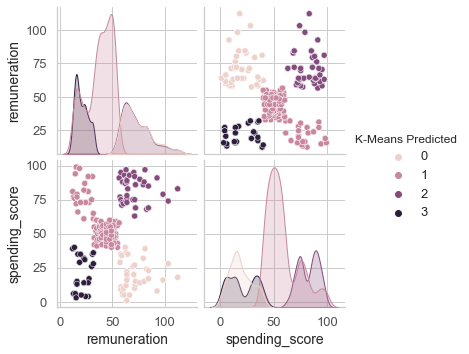

In [62]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

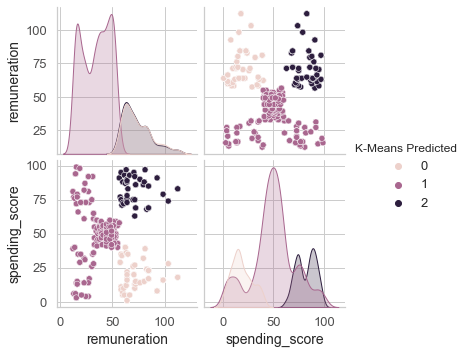

In [63]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

We use the elbow method to determine the optimum number of clusters.
To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.We see from the elbow plot above that the optimum number of cluster seems to be 5 . k=5 also seems the most appropriate value of k (or number of clusters) based on the silhouette method and the pair plot using 5 clusters.

## 5. Fit final model and justify your choice

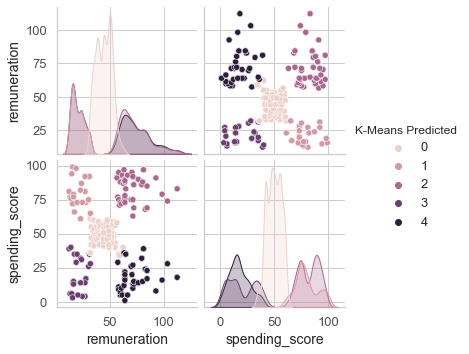

In [64]:
# Apply the final model.
# Use 5 clusters:
x=df2[['remuneration','spending_score']]
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [65]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [66]:
# View the DataFrame.
x

remuneration  spending_score  K-Means Predicted
0            12.30              39                  3
1            12.30              81                  1
2            13.12               6                  3
3            13.12              77                  1
4            13.94              40                  3
...            ...             ...                ...
1995         84.46              69                  2
1996         92.66               8                  4
1997         92.66              91                  2
1998         98.40              16                  4
1999         92.66               8                  4

[2000 rows x 3 columns]

In [67]:
print(kmeans.feature_names_in_)
centroids = kmeans.cluster_centers_
centroids.round(2)

['remuneration' 'spending_score']


array([[44.42, 49.53],
       [20.35, 79.42],
       [73.24, 82.01],
       [20.42, 19.76],
       [74.83, 17.42]])

## 6. Plot and interpret the clusters

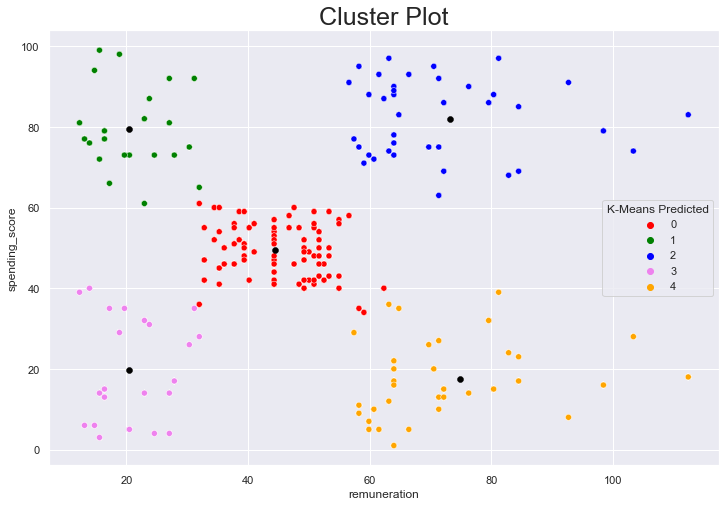

In [68]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

ax =sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'violet','orange'])
ax =sns.scatterplot(x=centroids[:,0] , 
                y =centroids[:,1],
                data=centroids ,
                color='black',
                ec='black', legend=False)
plt.title("Cluster Plot",fontsize=25)
plt.show()


## 7. Discuss: Insights and observations

***Your observations here...***

Using methods such as the Elbow method and Silhouette method we identified 5 main clusters in the dataset as following-:

CLUSTER NUMBER REMUNERATION SPENDING-SCORE

            0      44.42	49.53
            
            1	   20.35	79.42
            
            2	   73.24	82.01
            
            3	   20.42	19.76
            
            4	   74.83	17.42


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Steps followed -:
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [69]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [70]:
# Load the data set as df3.

df3=pd.read_csv("turtle_reviews_cleaned.csv")
# View DataFrame.
df3

gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [71]:
# Explore data set.
df3.shape

(2000, 9)

In [72]:
# Keep necessary columns. Drop unnecessary columns.
# Since our aim is to conduct a sentiment analysis we can keep the columns necessary for that and drop the rest.
reviews_data = df3[['review','summary']].copy()
# View DataFrame.
reviews_data

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [73]:
# Determine if there are any missing values.
reviews_data.isnull().sum()

review     0
summary    0
dtype: int64

In [74]:
reviews_data[reviews_data.review.duplicated()]

review  \
326                                             love it   
371                                              Great!   
408                                               great   
416                                             love it   
811                                          great game   
959                                             Love it   
1006                                         great game   
1037                                            Awesome   
1145                                               nice   
1155                             On-time and nice item.   
1186                                               Good   
1267  This set is slightly worse than earlier ones (...   
1337                                            love it   
1382                                            Love it   
1414                   Great expansion to a great game.   
1540                                            love it   
1544                                             Great!   
1553                                        As expected   
1651                                        As expected   
1713                                        Love these!   

                                        summary  
326                                  Five Stars  
371                                  Five Stars  
408                                  Five Stars  
416                                  Five Stars  
811                                  Five Stars  
959                                  Five Stars  
1006                                 Five Stars  
1037                                 Five Stars  
1145                                 Five Stars  
1155                                 Five Stars  
1186                                 Five Stars  
1267  Dungeon Tiles Master Set - The Wilderness  
1337                                    love it  
1382                                 Five Stars  
1414                                 Five Stars  
1540                                 Five Stars  
1544                                 Five Stars  
1553                                 Five Stars  
1651                                 Five Stars  
1713                                 Five Stars

In [75]:
reviews_data[reviews_data.summary.duplicated()]

review         summary
5                                        Grandson loves      Five Stars
7                            Came in perfect condition.      Five Stars
10                                      Works very well      Five Stars
15                          Very fun game for my family      Five Stars
27                                   Beautiful art work      Five Stars
...                                                 ...             ...
1993                                               Gift            Gift
1996  Great game.  Did not think I would like it whe...       Super fun
1997  Great game for all.........\nKeeps the mind ni...      Great Game
1998                                          fun game!      Four Stars
1999  This game is fun. A lot like scrabble without ...  Love this game

[568 rows x 2 columns]

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [76]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
reviews_data['review'] = reviews_data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews_data['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [77]:
# Summary: Change all to lower case and join with a space.
reviews_data['summary'] = reviews_data['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews_data['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [78]:
# Replace all the punctuations in review column.
# Remove punctuation.
# '[^\w\s]'- removes non-word and non-white space characters
reviews_data['review'] = reviews_data['review'].str.replace('[^\w\s]','')

# View output.
reviews_data['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [79]:
# Replace all the puncuations in summary column.
reviews_data['summary'] = reviews_data['summary'].str.replace('[^\w\s]','')

# View output.
reviews_data['summary'].head()



0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [80]:
# dataframe copy without duplicates in both columns.
rev_clnd = reviews_data.copy()
rev_clnd.drop_duplicates(subset=['review','summary'],inplace=True)
# Preview data.
rev_clnd.head()
# View DataFrame.
rev_clnd

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game did not think i would like it when ...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1961 rows x 2 columns]

## 3. Tokenise and create wordclouds

In [81]:
# Apply tokenisation to both columns.
rev_clnd['rev_tokens']=rev_clnd['review'].apply(word_tokenize)
rev_clnd['summary_tokens']=rev_clnd['summary'].apply(word_tokenize)
# View DataFrame.
rev_clnd.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                          rev_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [82]:
# Review: Create a word cloud.
# Set the colour palette.

all_reviews = ''
for value in rev_clnd['rev_tokens']:
    for i in range(0,len(value)):
    # Add each token word to the string.
        all_reviews = all_reviews + value[i] + ' '
    

sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = None,
                min_font_size = 10).generate(all_reviews) 

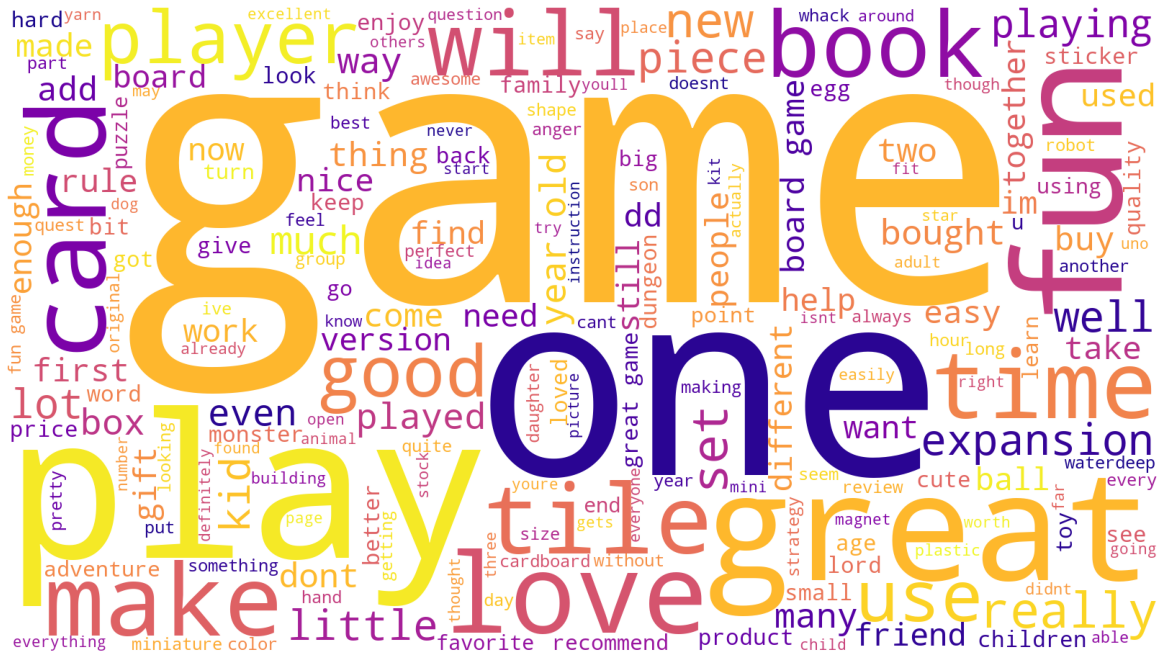

In [83]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


In [84]:
# Summary: Create a word cloud.
all_summary = ''
for value in rev_clnd['summary_tokens']:
    for i in range(0,len(value)):
    # Add each token word to the string.
        all_summary = all_summary + value[i] + ' '
    

sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = None,
                min_font_size = 10).generate(all_summary) 

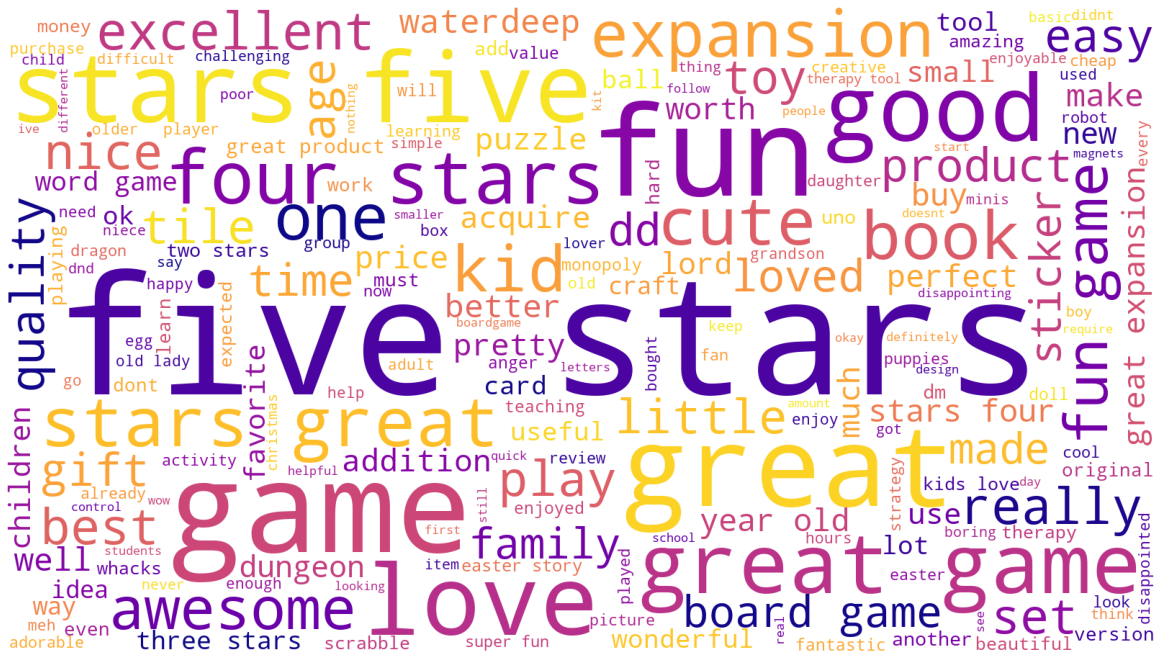

In [85]:
# Summary: Plot the WordCloud image.
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [86]:
# Determine the frequency distribution.
tokens = []
for value in rev_clnd['summary_tokens']:
    # Add each token word to the string.
    tokens = tokens + value
fdist_reviews = FreqDist(tokens)

# Preview the data.
fdist_reviews



FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [87]:
# Determine the frequency distribution.
tokens = []
for value in rev_clnd['rev_tokens']:
    # Add each token word to the string.
    tokens = tokens + value
fdist_summary = FreqDist(tokens)

# Preview the data.
fdist_summary

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

### 4b) Remove  stopwords

In [88]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

review_tokens=[]
tokens=[]

# Remove all the stopwords in reviews

for value in rev_clnd['rev_tokens']:
    # Add each token word to the string.
    tokens = tokens + value
review_tokens = [x for x in tokens if x.lower() not in english_stopwords]

# Determine the frequency distribution.
fdist_reviews = FreqDist(review_tokens)

# Preview the data.
fdist_reviews

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [89]:
# Remove all the stopwords in summary
summary_tokens=[]
tokens=[]

# Remove all the stopwords in reviews

for value in rev_clnd['summary_tokens']:
    # Add each token word to the string.
    tokens = tokens + value
summary_tokens = [x for x in tokens if x.lower() not in english_stopwords]

# Determine the frequency distribution.
fdist_summary = FreqDist(summary_tokens)

# Preview the data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

### 4c) Identify 15 most common words 

In [90]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(review_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_counts

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

In [91]:
# Generate a DataFrame from Counter.
summary_counts = pd.DataFrame(Counter(summary_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
summary_counts

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

### 4d) Plot 15 most common words 

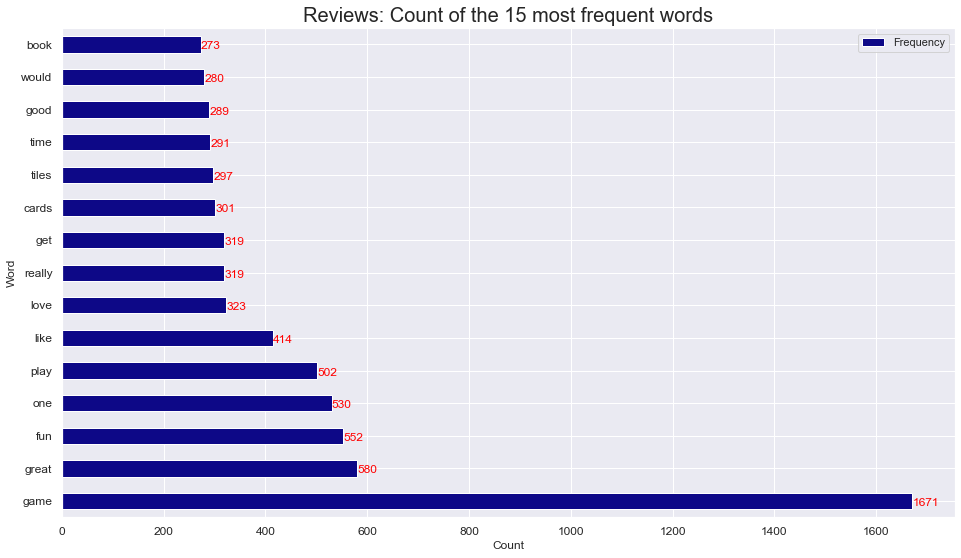

In [92]:
# Visualise the 15 most common words in reviews.
# Set the plot type.
ax = review_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,colormap ='plasma')
#ax=sns.barplot(x=review_counts.index,y=review_counts.Frequency,data=review_counts)
# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Reviews: Count of the 15 most frequent words",fontsize=20)

# Draw the bar labels.
#for i in ax.containers:
    #ax.bar_label(i,)
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

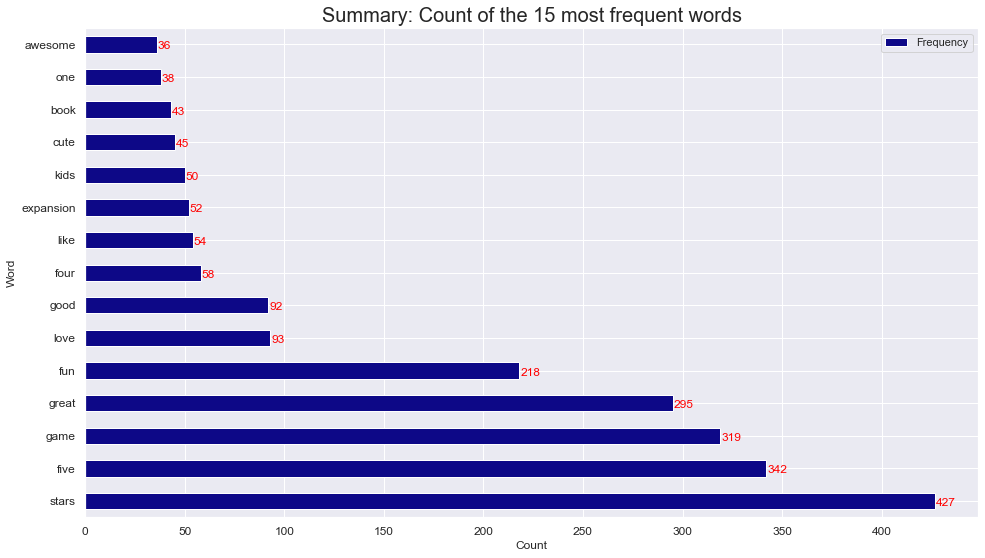

In [93]:
# Visualise the 15 most common words in reviews.
# Set the plot type.
ax = summary_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [94]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [95]:
# Populate a new column with review polarity scores
rev_clnd['review_polarity'] = rev_clnd['review'].apply(generate_polarity)

# Preview the result.
rev_clnd['review_polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64

In [96]:
# Populate a new column with summary polarity scores
rev_clnd['summary_polarity'] = rev_clnd['summary'].apply(generate_polarity)

# Preview the result.
rev_clnd['summary_polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

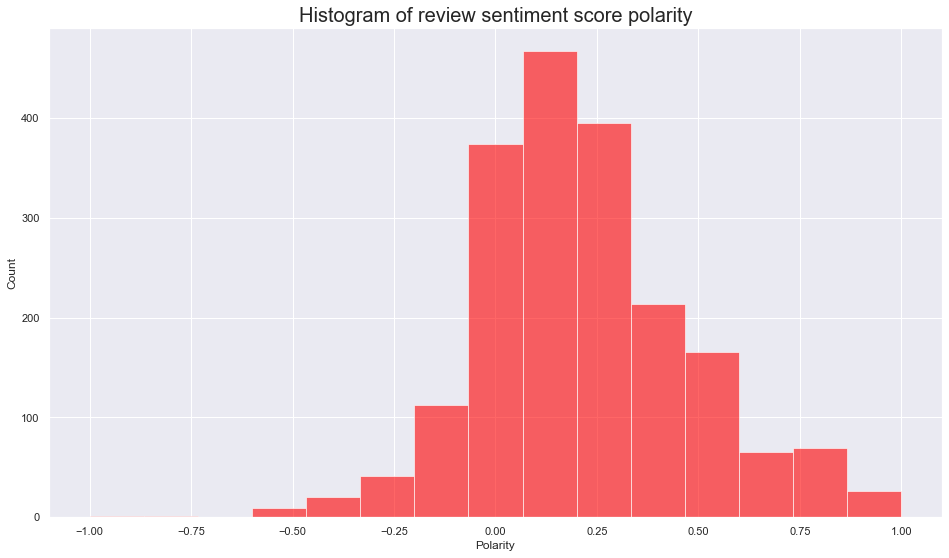

In [97]:
# Review: Create a histogram plot with bins = 15.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(rev_clnd['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of review sentiment score polarity', fontsize=20)

plt.show()

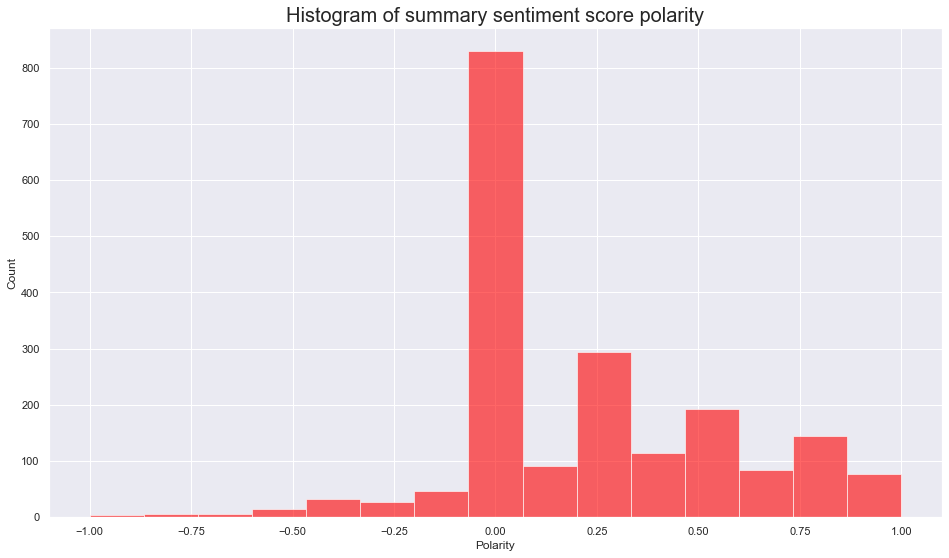

In [98]:
# Summary: Create a histogram plot with bins = 15.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(rev_clnd['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of summary sentiment score polarity', fontsize=20)

plt.show()


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [99]:
# Top 20 negative reviews.
top_20_neg_reviews=rev_clnd.sort_values(by='review_polarity',ascending=True).head(20)

# View output.
top_20_neg_reviews[['review','review_polarity']]

review  review_polarity
208   booo unles you are patient know how to measure...        -1.000000
182                   incomplete kit very disappointing        -0.780000
1804  im sorry i just find this product to be boring...        -0.583333
364   one of my staff will be using this game soon s...        -0.550000
1524                         expensive for what you get        -0.500000
117   i bought this as a christmas gift for my grand...        -0.500000
230                    i found the directions difficult        -0.500000
290              instructions are complicated to follow        -0.500000
301                                           difficult        -0.500000
227   this was a gift for my daughter i found it dif...        -0.500000
174   i sent this product to my granddaughter the po...        -0.491667
347   my 8 yearold granddaughter and i were very fru...        -0.446250
538   i purchased this on the recommendation of two ...        -0.440741
306                 very hard complicated to make these        -0.439583
824             was a gift for my son he loves the game        -0.400000
803                                this game is a blast        -0.400000
989   if you like me used to play dd but now you and...        -0.400000
1827                                           jun game        -0.400000
1446  you can play the expansions one at a time or a...        -0.400000
806         i bought this for my son he loves this game        -0.400000

In [100]:
# Top 20 positive reviews.

top_20_pos_reviews=rev_clnd.sort_values(by='review_polarity',ascending=False).head(20)
top_20_pos_reviews[['review','review_polarity']]

review  review_polarity
790                                             perfect              1.0
1726                  excellent toy to simulate thought              1.0
194                                        awesome gift              1.0
1967       perfect for tutoring my grandson in spelling              1.0
1177               awesome addition to my rpg gm system              1.0
1168               best set buy 2 if you have the means              1.0
524                         perfect just what i ordered              1.0
1715                                        awesome toy              1.0
1720  it is the best thing to play with and also min...              1.0
621   wonderful for my grandson to learn the resurre...              1.0
1135                                        awesome set              1.0
1609  this was perfect to go with the 7 bean bags  i...              1.0
1401  one of the best board games i played in along ...              1.0
609                                  delightful product              1.0
1301                                        its awesome              1.0
7                             came in perfect condition              1.0
165                                        awesome book              1.0
591                                   wonderful product              1.0
933                                             awesome              1.0
496   excellent activity for teaching selfmanagement...              1.0

In [101]:
# Top 20 negative reviews.
top_20_neg_summary=rev_clnd.sort_values(by='summary_polarity',ascending=True).head(20)

# View output.
top_20_neg_summary[['summary','summary_polarity']]

summary  summary_polarity
208    boring unless you are a craft person which i am          -1.000000
21                        the worst value ive ever seen         -1.000000
829                                              boring         -1.000000
1166  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
793                                        disappointed         -0.750000
1620                                       disappointed         -0.750000
144                                        disappointed         -0.750000
631                                        disappointed         -0.750000
363   promotes anger instead of teaching calming met...         -0.700000
885            too bad this is not what i was expecting         -0.700000
890                        bad qualityall made of paper         -0.700000
178     at age 31 i found these very difficult to make          -0.650000
518                                          mad dragon         -0.625000
101                                    small and boring         -0.625000
1804                                      disappointing         -0.600000
1015                                      disappointing         -0.600000
1115                                      disappointing         -0.600000
805                                       disappointing         -0.600000
1003  then you will find this board game to be dumb ...         -0.591667

In [102]:
# Top 20 positive reviews.
top_20_pos_summary=rev_clnd.sort_values(by='summary_polarity',ascending=False).head(20)

# View output.
top_20_pos_summary[['summary','summary_polarity']]

summary  summary_polarity
1028                                   one of the best               1.0
1935                                         excellent               1.0
815                         one of the best games ever               1.0
1630                             awesome learning tool               1.0
163                    he was very happy with his gift               1.0
1170                               best orcs from wotc               1.0
1388                                 awesome expansion               1.0
1078                                      perfect gift               1.0
140             awesome sticker activity for the price               1.0
1171                                           awesome               1.0
647                                          wonderful               1.0
651              all f the mudpuppy toys are wonderful               1.0
1488  the perfect gift for preschool construction fans               1.0
1083                              best dungeon crawler               1.0
657                                     awesome puzzle               1.0
980                   the best among the dd boardgames               1.0
1230                 awesome addition to our dd antics               1.0
161                                       awesome book               1.0
1417                                     wonderful and               1.0
1454                                 awesome expansion               1.0

## 7. Insights and observations


We used natural language processing techniques to analyze the customer reviews and to identify keywords, topics etc.We then classified the reviews as negative or positive using an inbuilt sentiment classifier in Python called Textblob. When a sentence is passed into Textblob it gives two outputs, which are polarity and subjectivity. Polarity is the output that lies between -1 and 1, where -1 refers to negative sentiment and +1 refers to positive sentiment. Viewing the histogram of both review and summary polarity scores we notice that the histogram is skewed positively indicating more positive reviews than negative ones.